# Prepare rules for the my book the data sets
1) Try different values of support and confidence. Observe the change in number of rules for different support,confidence values
2) Change the minimum length in apriori algorithm
3) Visulize the obtained rules using different plots 

## Data Description:

- Columns : Name Of Movies
- Row : Number Of People

## Attaching Resources

### Importing Necessary Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as pe
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori,association_rules

import warnings

warnings.filterwarnings('ignore')
plt.rcParams['figure.figsize'] = (10,5)
plt.rcParams['figure.dpi'] = 250
sns.set_style(style='darkgrid')
plt.tight_layout()
%matplotlib inline

### Adding Dataset

In [2]:
bk = pd.read_csv('https://raw.githubusercontent.com/kunal-mallick/Data-Science-Assignments/main/Assignment_09_Association%20Rules/Dataset/book.csv')

bk

,ChildBks,YouthBks,CookBks,DoItYBks,RefBks,ArtBks,GeogBks,ItalCook,ItalAtlas,ItalArt,Florence
0,0,1,0,1,0,0,1,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0
3,1,1,1,0,1,0,1,0,0,0,0
4,0,0,1,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
1995,0,0,1,0,0,1,1,1,0,1,1
1996,0,0,0,0,0,0,0,0,0,0,0
1997,0,0,0,0,0,0,0,0,0,0,0
1998,0,0,1,0,0,0,0,0,0,0,0


## Performing EDA In Dataset

### Applying Descriptive Statistics

In [3]:
bk.sum()

ChildBks     846
YouthBks     495
CookBks      862
DoItYBks     564
RefBks       429
ArtBks       482
GeogBks      552
ItalCook     227
ItalAtlas     74
ItalArt       97
Florence     217
dtype: int64

In [4]:
bk.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   ChildBks   2000 non-null   int64
 1   YouthBks   2000 non-null   int64
 2   CookBks    2000 non-null   int64
 3   DoItYBks   2000 non-null   int64
 4   RefBks     2000 non-null   int64
 5   ArtBks     2000 non-null   int64
 6   GeogBks    2000 non-null   int64
 7   ItalCook   2000 non-null   int64
 8   ItalAtlas  2000 non-null   int64
 9   ItalArt    2000 non-null   int64
 10  Florence   2000 non-null   int64
dtypes: int64(11)
memory usage: 172.0 KB


In [5]:
bk.isna().sum()

ChildBks     0
YouthBks     0
CookBks      0
DoItYBks     0
RefBks       0
ArtBks       0
GeogBks      0
ItalCook     0
ItalAtlas    0
ItalArt      0
Florence     0
dtype: int64

In [6]:
def uni(df):

    for i in range(len(df.columns)):
        print('\n All Unique Value in ' + str(df.columns[i]))
        print(np.sort(df[df.columns[i]].unique()))
        print('Total no of unique values ' +
                str(len(df[df.columns[i]].unique())))


In [7]:
uni(bk)


 All Unique Value in ChildBks
[0 1]
Total no of unique values 2

 All Unique Value in YouthBks
[0 1]
Total no of unique values 2

 All Unique Value in CookBks
[0 1]
Total no of unique values 2

 All Unique Value in DoItYBks
[0 1]
Total no of unique values 2

 All Unique Value in RefBks
[0 1]
Total no of unique values 2

 All Unique Value in ArtBks
[0 1]
Total no of unique values 2

 All Unique Value in GeogBks
[0 1]
Total no of unique values 2

 All Unique Value in ItalCook
[0 1]
Total no of unique values 2

 All Unique Value in ItalAtlas
[0 1]
Total no of unique values 2

 All Unique Value in ItalArt
[0 1]
Total no of unique values 2

 All Unique Value in Florence
[0 1]
Total no of unique values 2


### Visualizing The Data

In [8]:
count = bk.sum()
count.sort_values(0, ascending = False, inplace=True)
count = count.to_frame().reset_index()
count = count.rename(columns = {'index': 'items',0: 'count'})
count

,items,count
0,CookBks,862
1,ChildBks,846
2,DoItYBks,564
3,GeogBks,552
4,YouthBks,495
5,ArtBks,482
6,RefBks,429
7,ItalCook,227
8,Florence,217
9,ItalArt,97


#### Ploting Barplot

Text(0.5, 1.0, 'Movies Purchase Frequency')

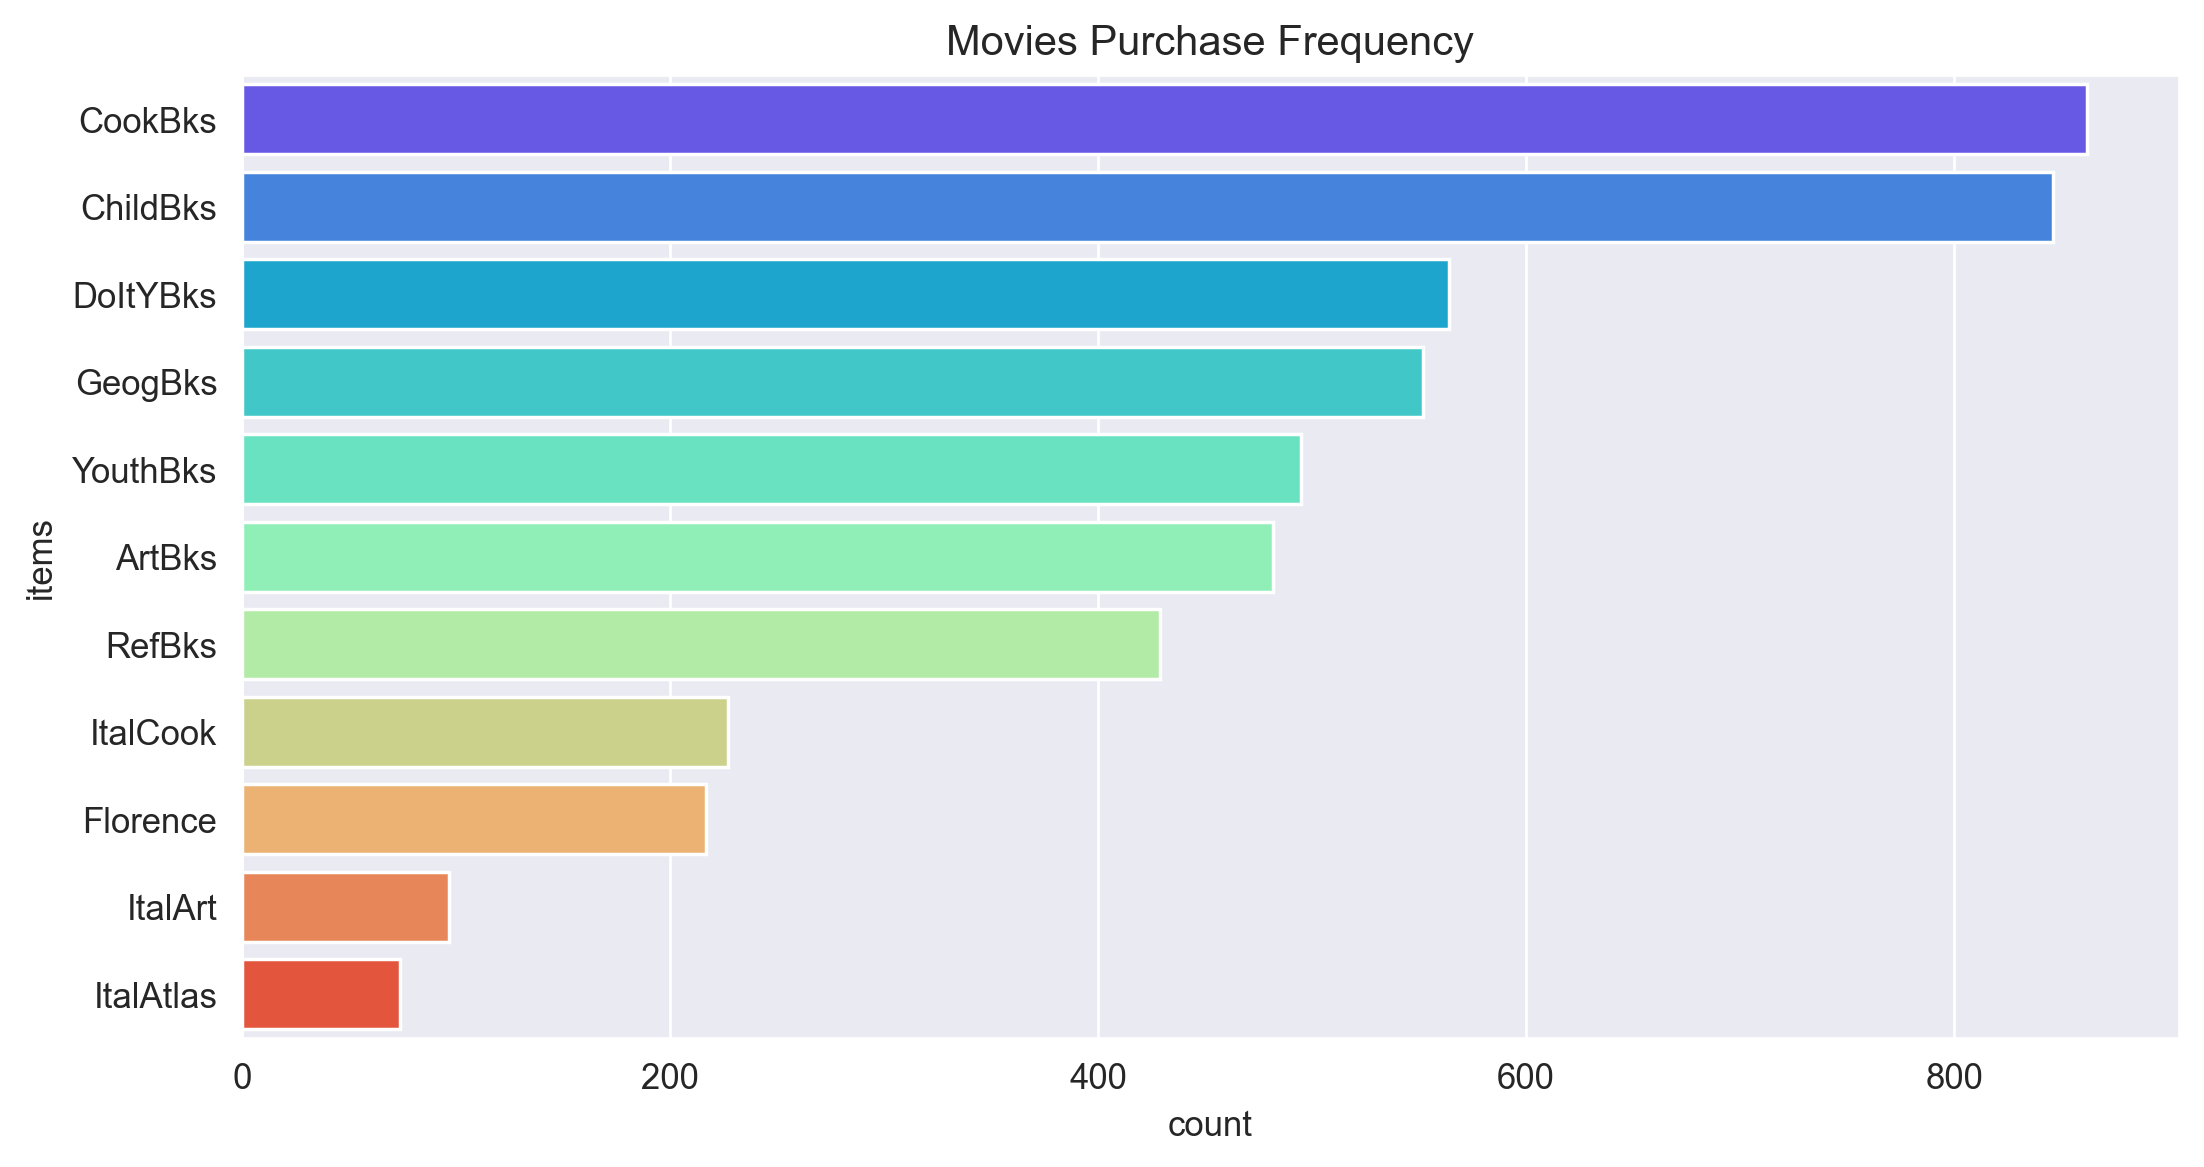

In [9]:
sns.barplot(x = 'count', y = 'items', data = count, palette = 'rainbow')
plt.title('Movies Purchase Frequency')

#### Ploting Pieplot

Text(0.5, 1.0, 'Market Share Of Each Movie')

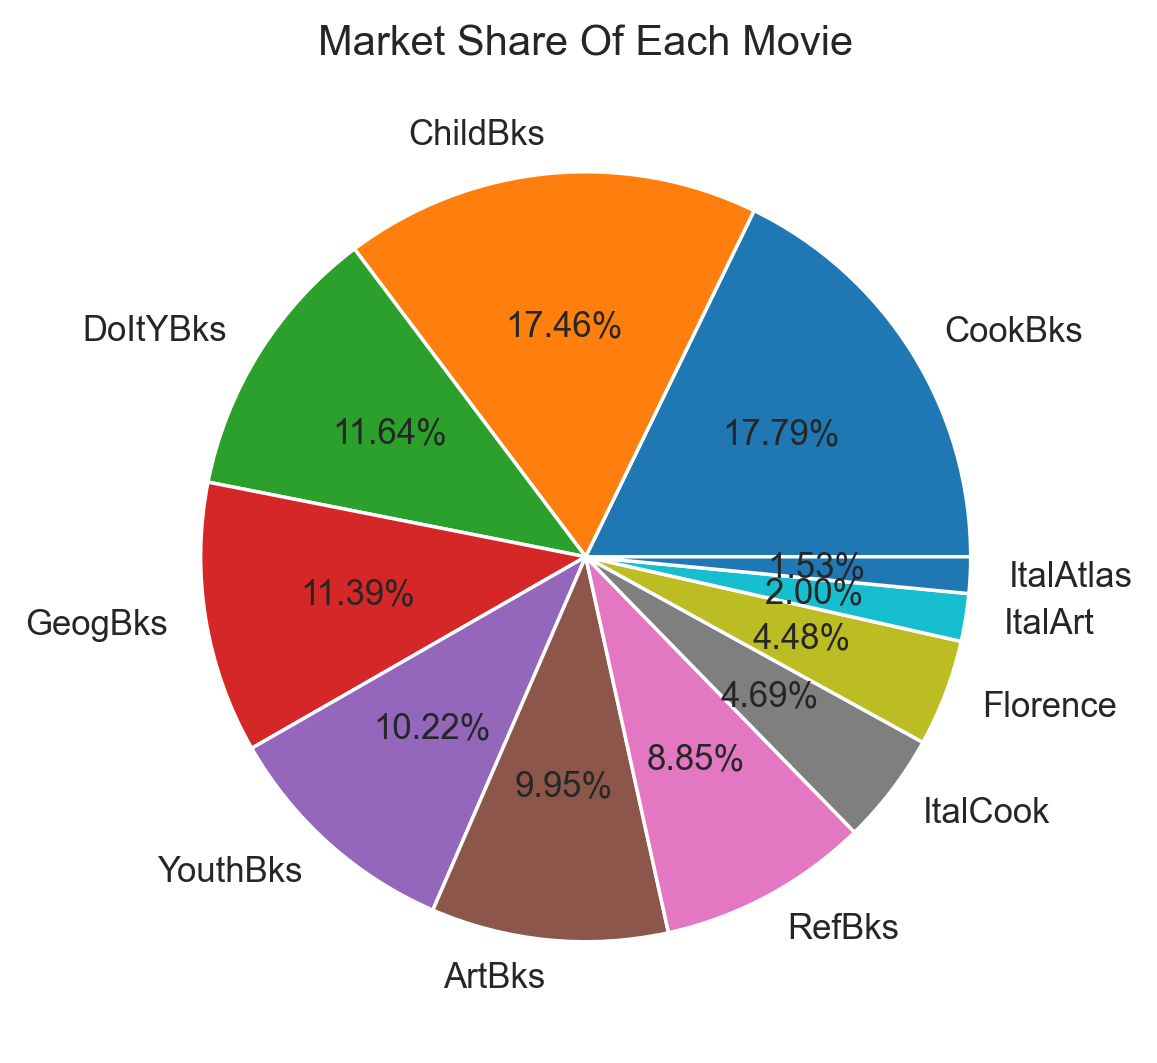

In [10]:
plt.pie(count['count'], labels = count['items'], autopct = '%.2f%%')
plt.title('Market Share Of Each Movie')

## Appling Association Rule on Dataset

### Appling Association rules with 20% Support

In [13]:
sp_20 = apriori(bk, min_support = 0.2, use_colnames = True)

sp_20

,support,itemsets
0,0.4230,(ChildBks)
1,0.2475,(YouthBks)
2,0.4310,(CookBks)
3,0.2820,(DoItYBks)
4,0.2145,(RefBks)
5,0.2410,(ArtBks)
6,0.2760,(GeogBks)
7,0.2560,"(CookBks, ChildBks)"


#### Creating Rules With 20% Support

In [14]:
model_20 = association_rules(sp_20, metric='lift')

model_20

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(CookBks),(ChildBks),0.431,0.423,0.256,0.593968,1.404179,0.073687,1.421069,0.505870
1,(ChildBks),(CookBks),0.423,0.431,0.256,0.605201,1.404179,0.073687,1.441240,0.498856


#### Dropping Rules Lower than 1 Lift Value

In [15]:
model_20.sort_values('lift', ascending = False, inplace = True)
model_20_lift1 = model_20[model_20.lift>1]
model_20_lift1.reset_index(inplace = True)

model_20_lift1

,index,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,0,(CookBks),(ChildBks),0.431,0.423,0.256,0.593968,1.404179,0.073687,1.421069,0.505870
1,1,(ChildBks),(CookBks),0.423,0.431,0.256,0.605201,1.404179,0.073687,1.441240,0.498856


- there are no rules lower than 1 lift value

#### Visualization Of Obtained Rule

##### Ploting Scatter And BarPlot

In [16]:
vm_15 = pd.DataFrame(
    {
        'support' : model_20_lift1['support'],
        'confidence' : model_20_lift1['confidence'],
        'lift' : round(model_20_lift1['lift'])
    }
)

vm_15

,support,confidence,lift
0,0.256,0.593968,1.0
1,0.256,0.605201,1.0


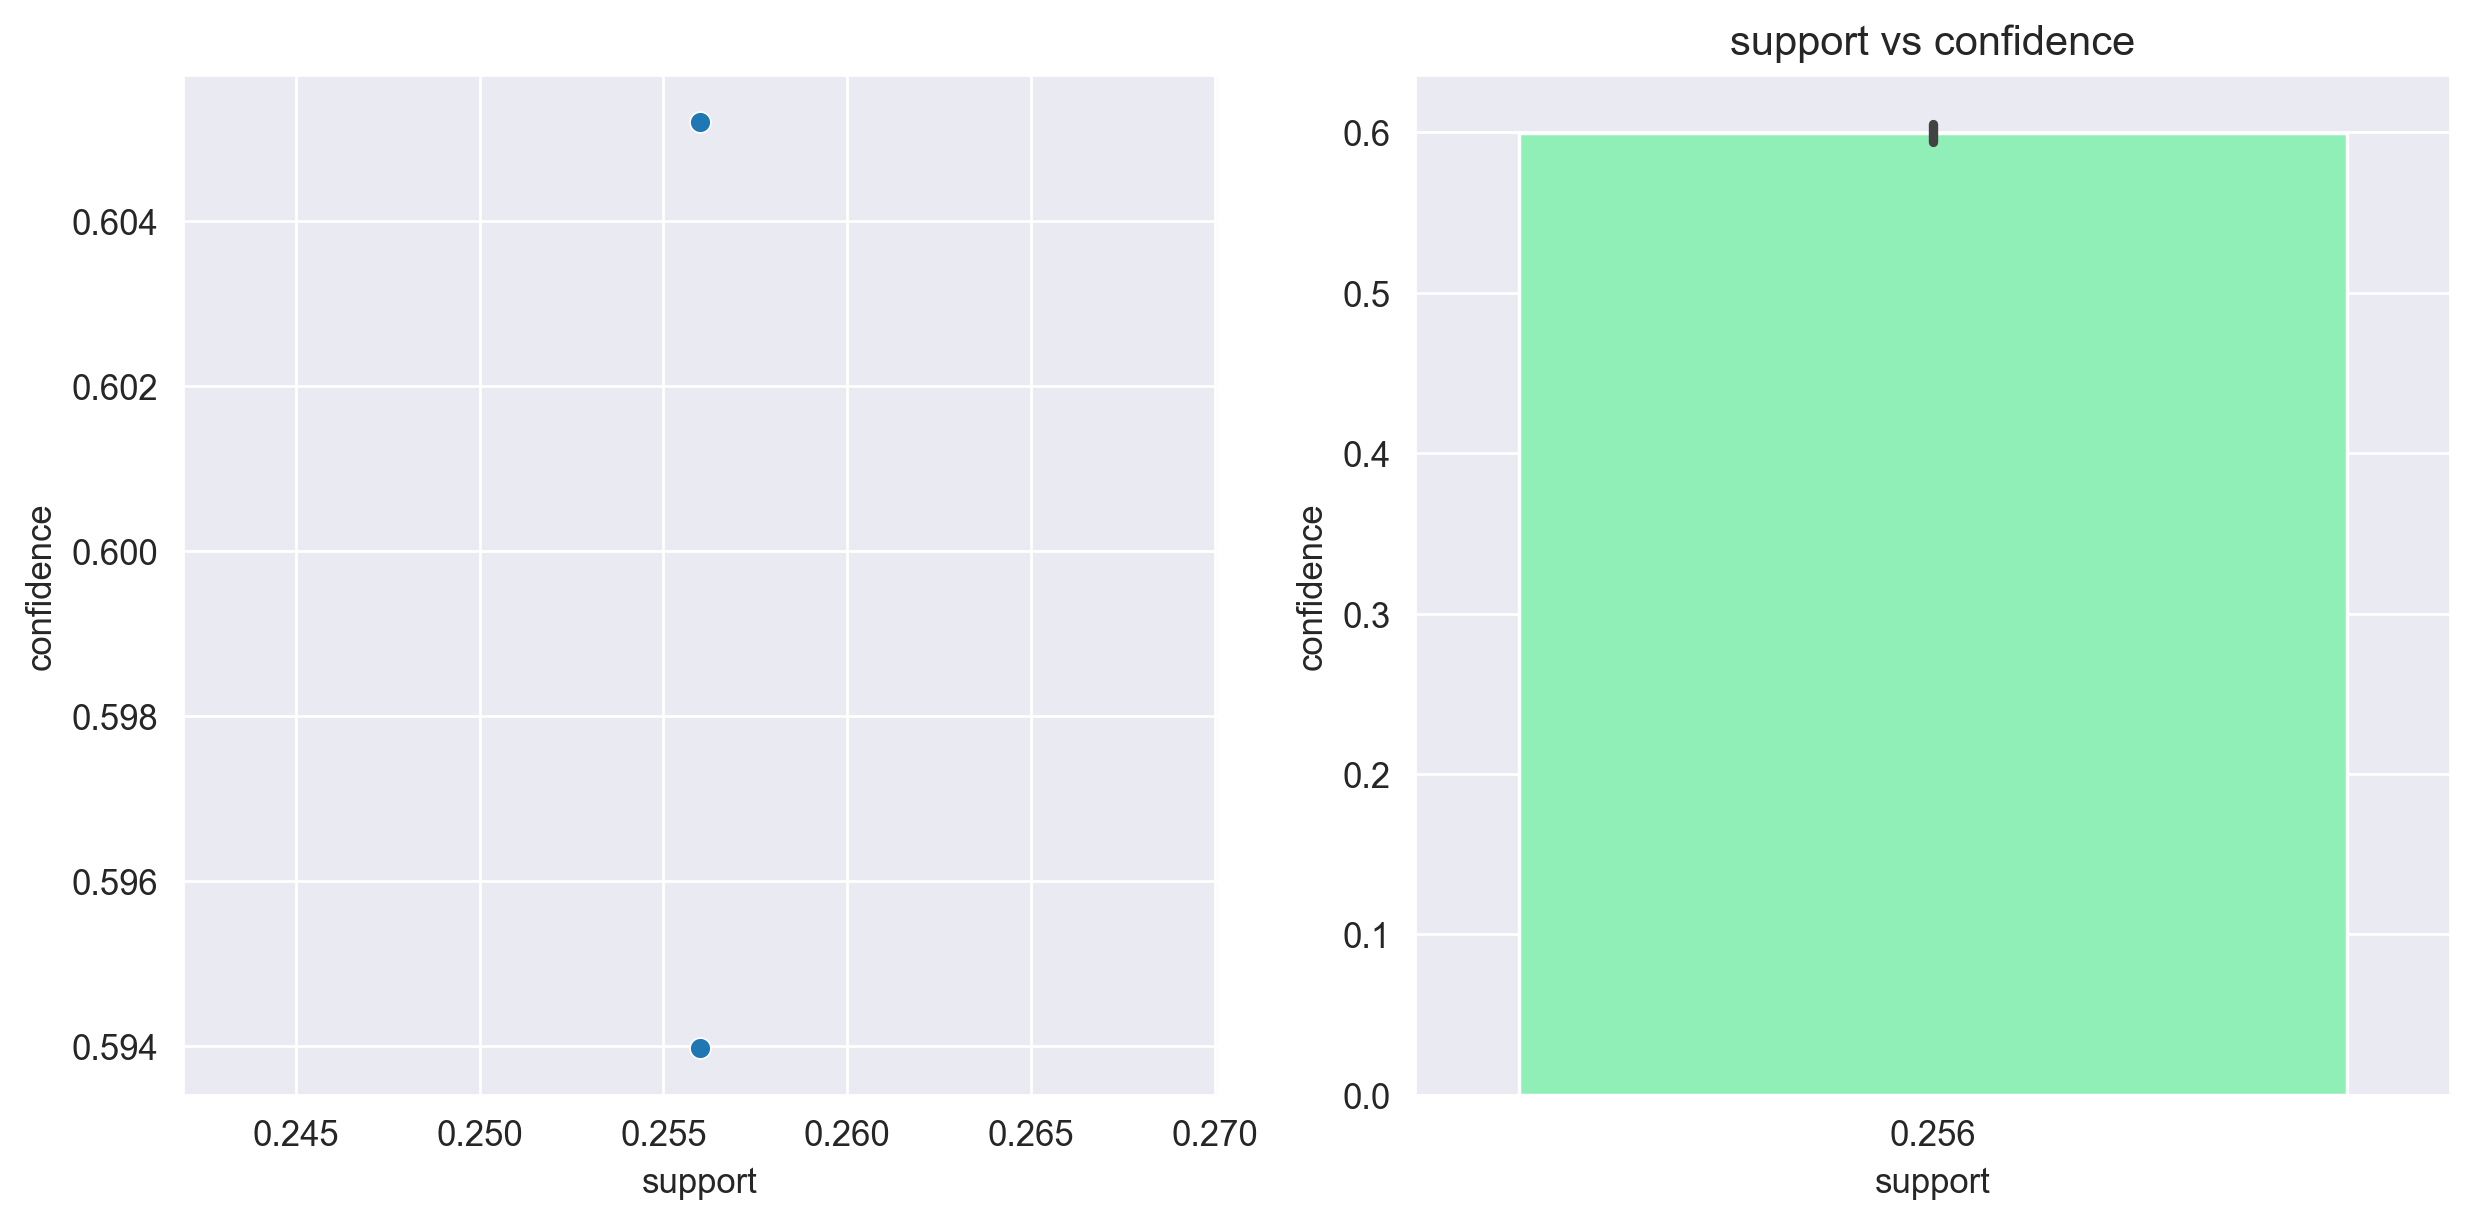

In [17]:
fig, ax = plt.subplots(ncols=2)

sns.scatterplot(vm_15['support'],vm_15['confidence'], palette='rainbow', ax= ax[0])
plt.title('support vs confidence')
sns.barplot(vm_15['support'],vm_15['confidence'], palette='rainbow', ax= ax[1])

plt.tight_layout()

##### Ploting Meatmap

Text(0.5, 1.0, 'HeatMap - ForLiftMatrix')

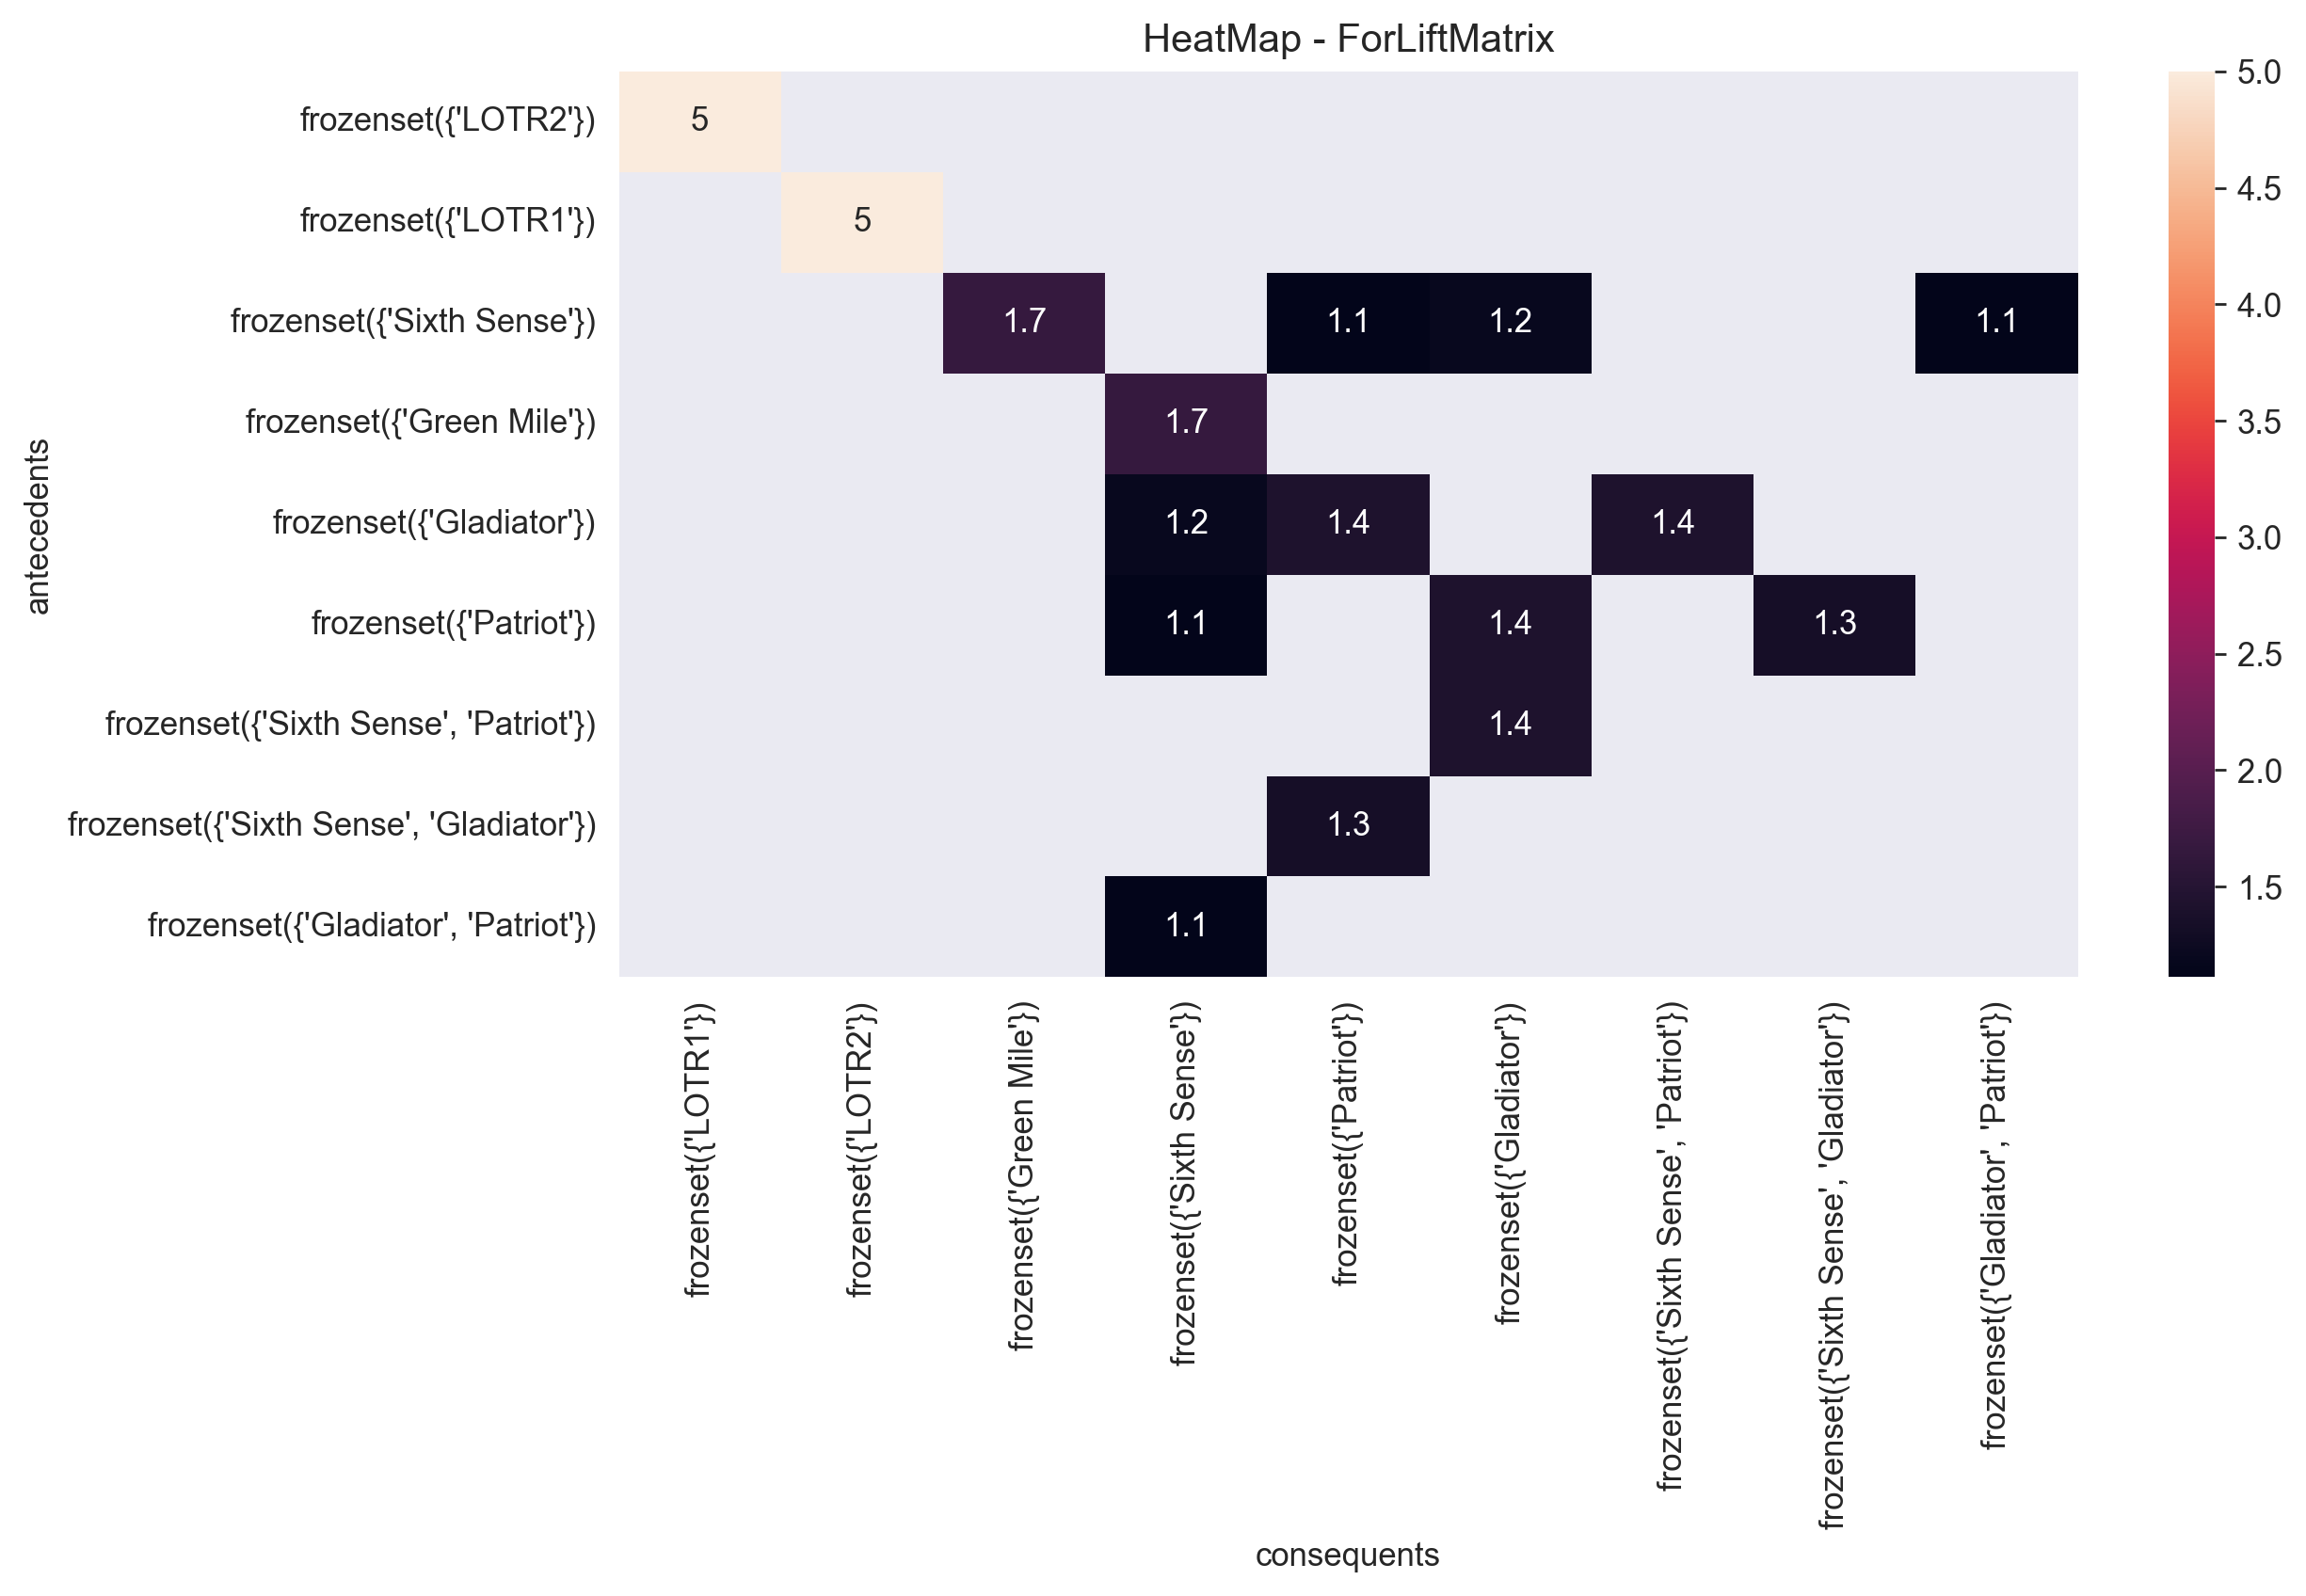

In [ ]:
matrix_20 = model_20_lift1.pivot('antecedents','consequents','lift')
sns.heatmap(matrix_20, annot=True)
plt.title('HeatMap - ForLiftMatrix')

### Appling Association rules with 15% Support

In [18]:
sp_15 = apriori(bk, min_support = 0.15, use_colnames = True)

sp_15

,support,itemsets
0,0.4230,(ChildBks)
1,0.2475,(YouthBks)
2,0.4310,(CookBks)
3,0.2820,(DoItYBks)
4,0.2145,(RefBks)
5,0.2410,(ArtBks)
6,0.2760,(GeogBks)
7,0.1650,"(YouthBks, ChildBks)"
8,0.2560,"(CookBks, ChildBks)"
9,0.1840,"(DoItYBks, ChildBks)"


#### Creating Rules With 15% Support

In [19]:
model_15 = association_rules(sp_15, metric='lift')

model_15

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(YouthBks),(ChildBks),0.2475,0.4230,0.1650,0.666667,1.576044,0.060308,1.731000,0.485714
1,(ChildBks),(YouthBks),0.4230,0.2475,0.1650,0.390071,1.576044,0.060308,1.233750,0.633449
2,(CookBks),(ChildBks),0.4310,0.4230,0.2560,0.593968,1.404179,0.073687,1.421069,0.505870
3,(ChildBks),(CookBks),0.4230,0.4310,0.2560,0.605201,1.404179,0.073687,1.441240,0.498856
4,(DoItYBks),(ChildBks),0.2820,0.4230,0.1840,0.652482,1.542511,0.064714,1.660347,0.489842
5,(ChildBks),(DoItYBks),0.4230,0.2820,0.1840,0.434988,1.542511,0.064714,1.270770,0.609543
6,(RefBks),(ChildBks),0.2145,0.4230,0.1515,0.706294,1.669725,0.060767,1.964548,0.510629
7,(ChildBks),(RefBks),0.4230,0.2145,0.1515,0.358156,1.669725,0.060767,1.223818,0.695146
8,(ArtBks),(ChildBks),0.2410,0.4230,0.1625,0.674274,1.594028,0.060557,1.771427,0.490986
9,(ChildBks),(ArtBks),0.4230,0.2410,0.1625,0.384161,1.594028,0.060557,1.232464,0.645855


#### Dropping Rules Lower than 1 Lift Value

In [20]:
model_15.sort_values('lift', ascending = False, inplace = True)
model_15_lift1 = model_15[model_15.lift>1]
model_15_lift1.reset_index(inplace = True)

model_15_lift1

,index,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,11,(ChildBks),(GeogBks),0.4230,0.2760,0.1950,0.460993,1.670264,0.078252,1.343211,0.695481
1,10,(GeogBks),(ChildBks),0.2760,0.4230,0.1950,0.706522,1.670264,0.078252,1.966074,0.554271
2,7,(ChildBks),(RefBks),0.4230,0.2145,0.1515,0.358156,1.669725,0.060767,1.223818,0.695146
3,6,(RefBks),(ChildBks),0.2145,0.4230,0.1515,0.706294,1.669725,0.060767,1.964548,0.510629
4,17,(RefBks),(CookBks),0.2145,0.4310,0.1525,0.710956,1.649549,0.060050,1.968556,0.501303
5,16,(CookBks),(RefBks),0.4310,0.2145,0.1525,0.353828,1.649549,0.060050,1.215621,0.692045
6,20,(GeogBks),(CookBks),0.2760,0.4310,0.1925,0.697464,1.618245,0.073544,1.880766,0.527689
7,21,(CookBks),(GeogBks),0.4310,0.2760,0.1925,0.446636,1.618245,0.073544,1.308361,0.671435
8,18,(CookBks),(ArtBks),0.4310,0.2410,0.1670,0.387471,1.607763,0.063129,1.239125,0.664355
9,19,(ArtBks),(CookBks),0.2410,0.4310,0.1670,0.692946,1.607763,0.063129,1.853095,0.498047


- there are no rules lower than 1 lift value

#### Visualization Of Obtained Rule

##### Ploting Scatter And BarPlot

In [21]:
vm_15 = pd.DataFrame(
    {
        'support' : model_15_lift1['support'],
        'confidence' : model_15_lift1['confidence'],
        'lift' : round(model_15_lift1['lift'])
    }
)

vm_15

,support,confidence,lift
0,0.1950,0.460993,2.0
1,0.1950,0.706522,2.0
2,0.1515,0.358156,2.0
3,0.1515,0.706294,2.0
4,0.1525,0.710956,2.0
5,0.1525,0.353828,2.0
6,0.1925,0.697464,2.0
7,0.1925,0.446636,2.0
8,0.1670,0.387471,2.0
9,0.1670,0.692946,2.0


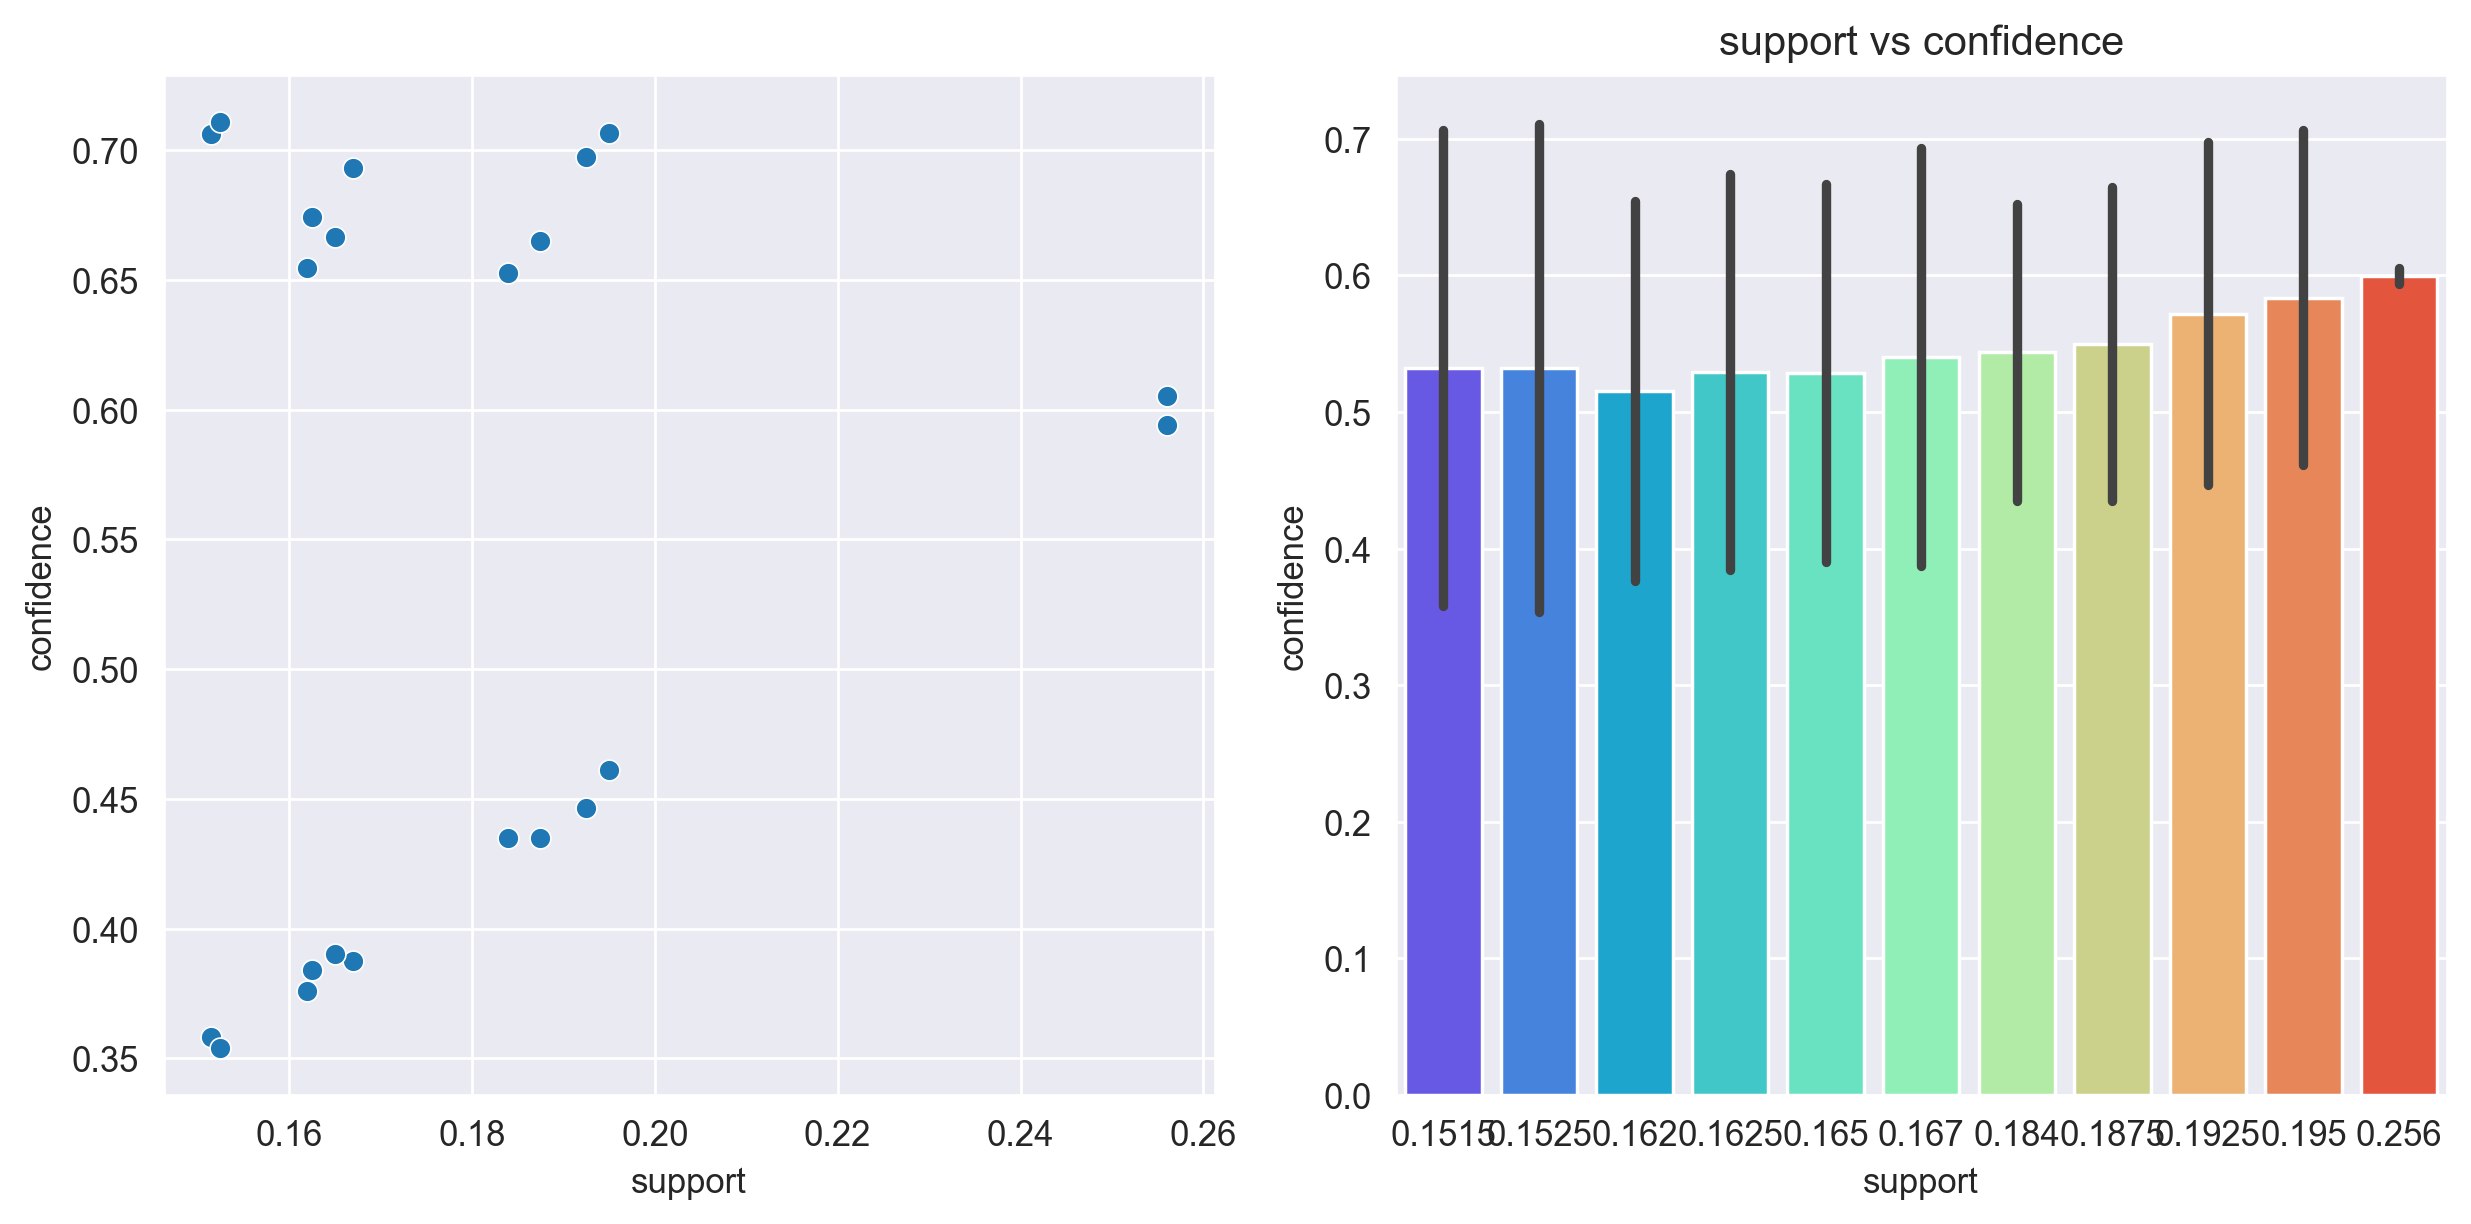

In [22]:
fig, ax = plt.subplots(ncols=2)

sns.scatterplot(vm_15['support'],vm_15['confidence'], palette='rainbow', ax= ax[0])
plt.title('support vs confidence')
sns.barplot(vm_15['support'],vm_15['confidence'], palette='rainbow', ax= ax[1])

plt.tight_layout()

##### Ploting Meatmap

Text(0.5, 1.0, 'HeatMap - ForLiftMatrix')

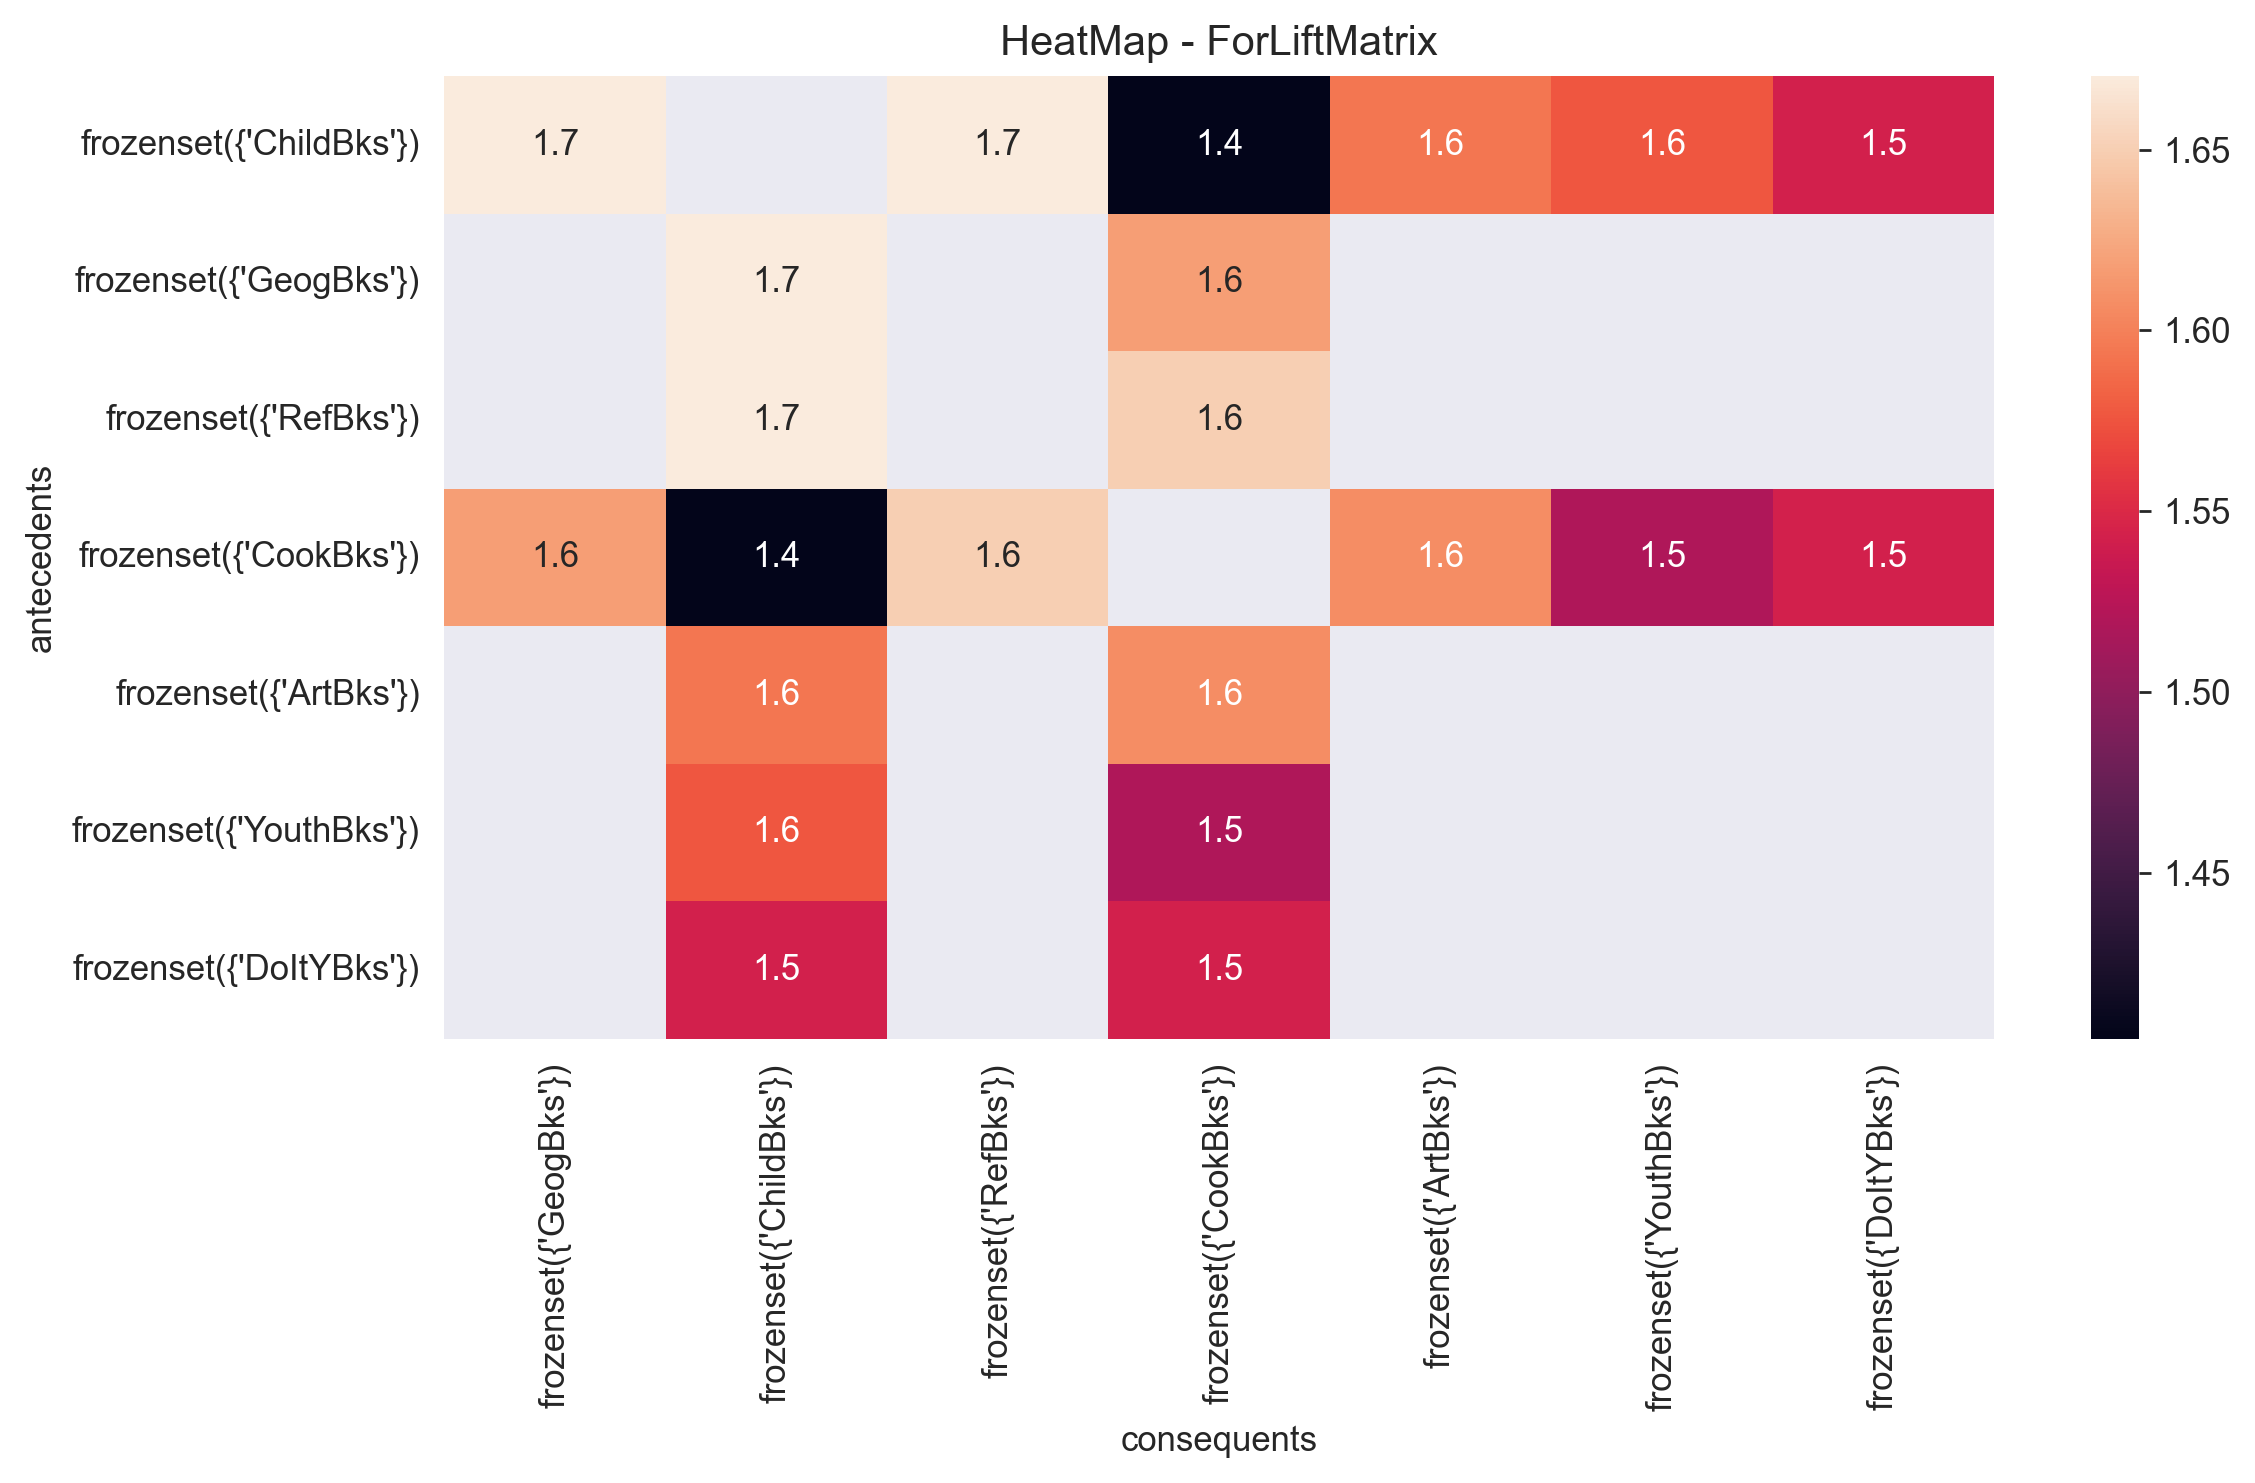

In [24]:
matrix_15 = model_15_lift1.pivot('antecedents','consequents','lift')
sns.heatmap(matrix_15, annot=True)
plt.title('HeatMap - ForLiftMatrix')

### Appling Association rules with 10% Support

In [26]:
sp_10 = apriori(bk, min_support = 0.1, use_colnames = True)

sp_10

,support,itemsets
0,0.4230,(ChildBks)
1,0.2475,(YouthBks)
2,0.4310,(CookBks)
3,0.2820,(DoItYBks)
4,0.2145,(RefBks)
5,0.2410,(ArtBks)
6,0.2760,(GeogBks)
7,0.1135,(ItalCook)
8,0.1085,(Florence)
9,0.1650,"(YouthBks, ChildBks)"


#### Creating Rules With 10% Support

In [27]:
model_10 = association_rules(sp_10, metric='lift')

model_10

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(YouthBks),(ChildBks),0.2475,0.4230,0.1650,0.666667,1.576044,0.060308,1.731000,0.485714
1,(ChildBks),(YouthBks),0.4230,0.2475,0.1650,0.390071,1.576044,0.060308,1.233750,0.633449
2,(CookBks),(ChildBks),0.4310,0.4230,0.2560,0.593968,1.404179,0.073687,1.421069,0.505870
3,(ChildBks),(CookBks),0.4230,0.4310,0.2560,0.605201,1.404179,0.073687,1.441240,0.498856
4,(DoItYBks),(ChildBks),0.2820,0.4230,0.1840,0.652482,1.542511,0.064714,1.660347,0.489842
...,...,...,...,...,...,...,...,...,...,...
95,"(GeogBks, ArtBks)",(CookBks),0.1275,0.4310,0.1035,0.811765,1.883445,0.048547,3.022812,0.537602
96,"(CookBks, ArtBks)",(GeogBks),0.1670,0.2760,0.1035,0.619760,2.245509,0.057408,1.904063,0.665866
97,(GeogBks),"(CookBks, ArtBks)",0.2760,0.1670,0.1035,0.375000,2.245509,0.057408,1.332800,0.766114
98,(CookBks),"(GeogBks, ArtBks)",0.4310,0.1275,0.1035,0.240139,1.883445,0.048547,1.148237,0.824355


#### Dropping Rules Lower than 1 Lift Value

In [28]:
model_10.sort_values('lift', ascending = False, inplace = True)
model_10_lift1 = model_10[model_10.lift>1]
model_10_lift1.reset_index(inplace = True)

model_10_lift1

,index,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,28,(CookBks),(ItalCook),0.4310,0.1135,0.1135,0.263341,2.320186,0.064582,1.203406,1.000000
1,29,(ItalCook),(CookBks),0.1135,0.4310,0.1135,1.000000,2.320186,0.064582,inf,0.641850
2,78,"(ChildBks, ArtBks)",(GeogBks),0.1625,0.2760,0.1020,0.627692,2.274247,0.057150,1.944628,0.669008
3,79,(GeogBks),"(ChildBks, ArtBks)",0.2760,0.1625,0.1020,0.369565,2.274247,0.057150,1.328448,0.773887
4,87,(ArtBks),"(DoItYBks, CookBks)",0.2410,0.1875,0.1015,0.421162,2.246196,0.056313,1.403674,0.730966
...,...,...,...,...,...,...,...,...,...,...,...
95,4,(DoItYBks),(ChildBks),0.2820,0.4230,0.1840,0.652482,1.542511,0.064714,1.660347,0.489842
96,12,(CookBks),(YouthBks),0.4310,0.2475,0.1620,0.375870,1.518667,0.055328,1.205678,0.600225
97,13,(YouthBks),(CookBks),0.2475,0.4310,0.1620,0.654545,1.518667,0.055328,1.647105,0.453858
98,3,(ChildBks),(CookBks),0.4230,0.4310,0.2560,0.605201,1.404179,0.073687,1.441240,0.498856


- there are no rules lower than 1 lift value

#### Visualization Of Obtained Rule

##### Ploting Scatter And BarPlot

In [29]:
vm_15 = pd.DataFrame(
    {
        'support' : model_10_lift1['support'],
        'confidence' : model_10_lift1['confidence'],
        'lift' : round(model_10_lift1['lift'])
    }
)

vm_15

,support,confidence,lift
0,0.1135,0.263341,2.0
1,0.1135,1.000000,2.0
2,0.1020,0.627692,2.0
3,0.1020,0.369565,2.0
4,0.1015,0.421162,2.0
...,...,...,...
95,0.1840,0.652482,2.0
96,0.1620,0.375870,2.0
97,0.1620,0.654545,2.0
98,0.2560,0.605201,1.0


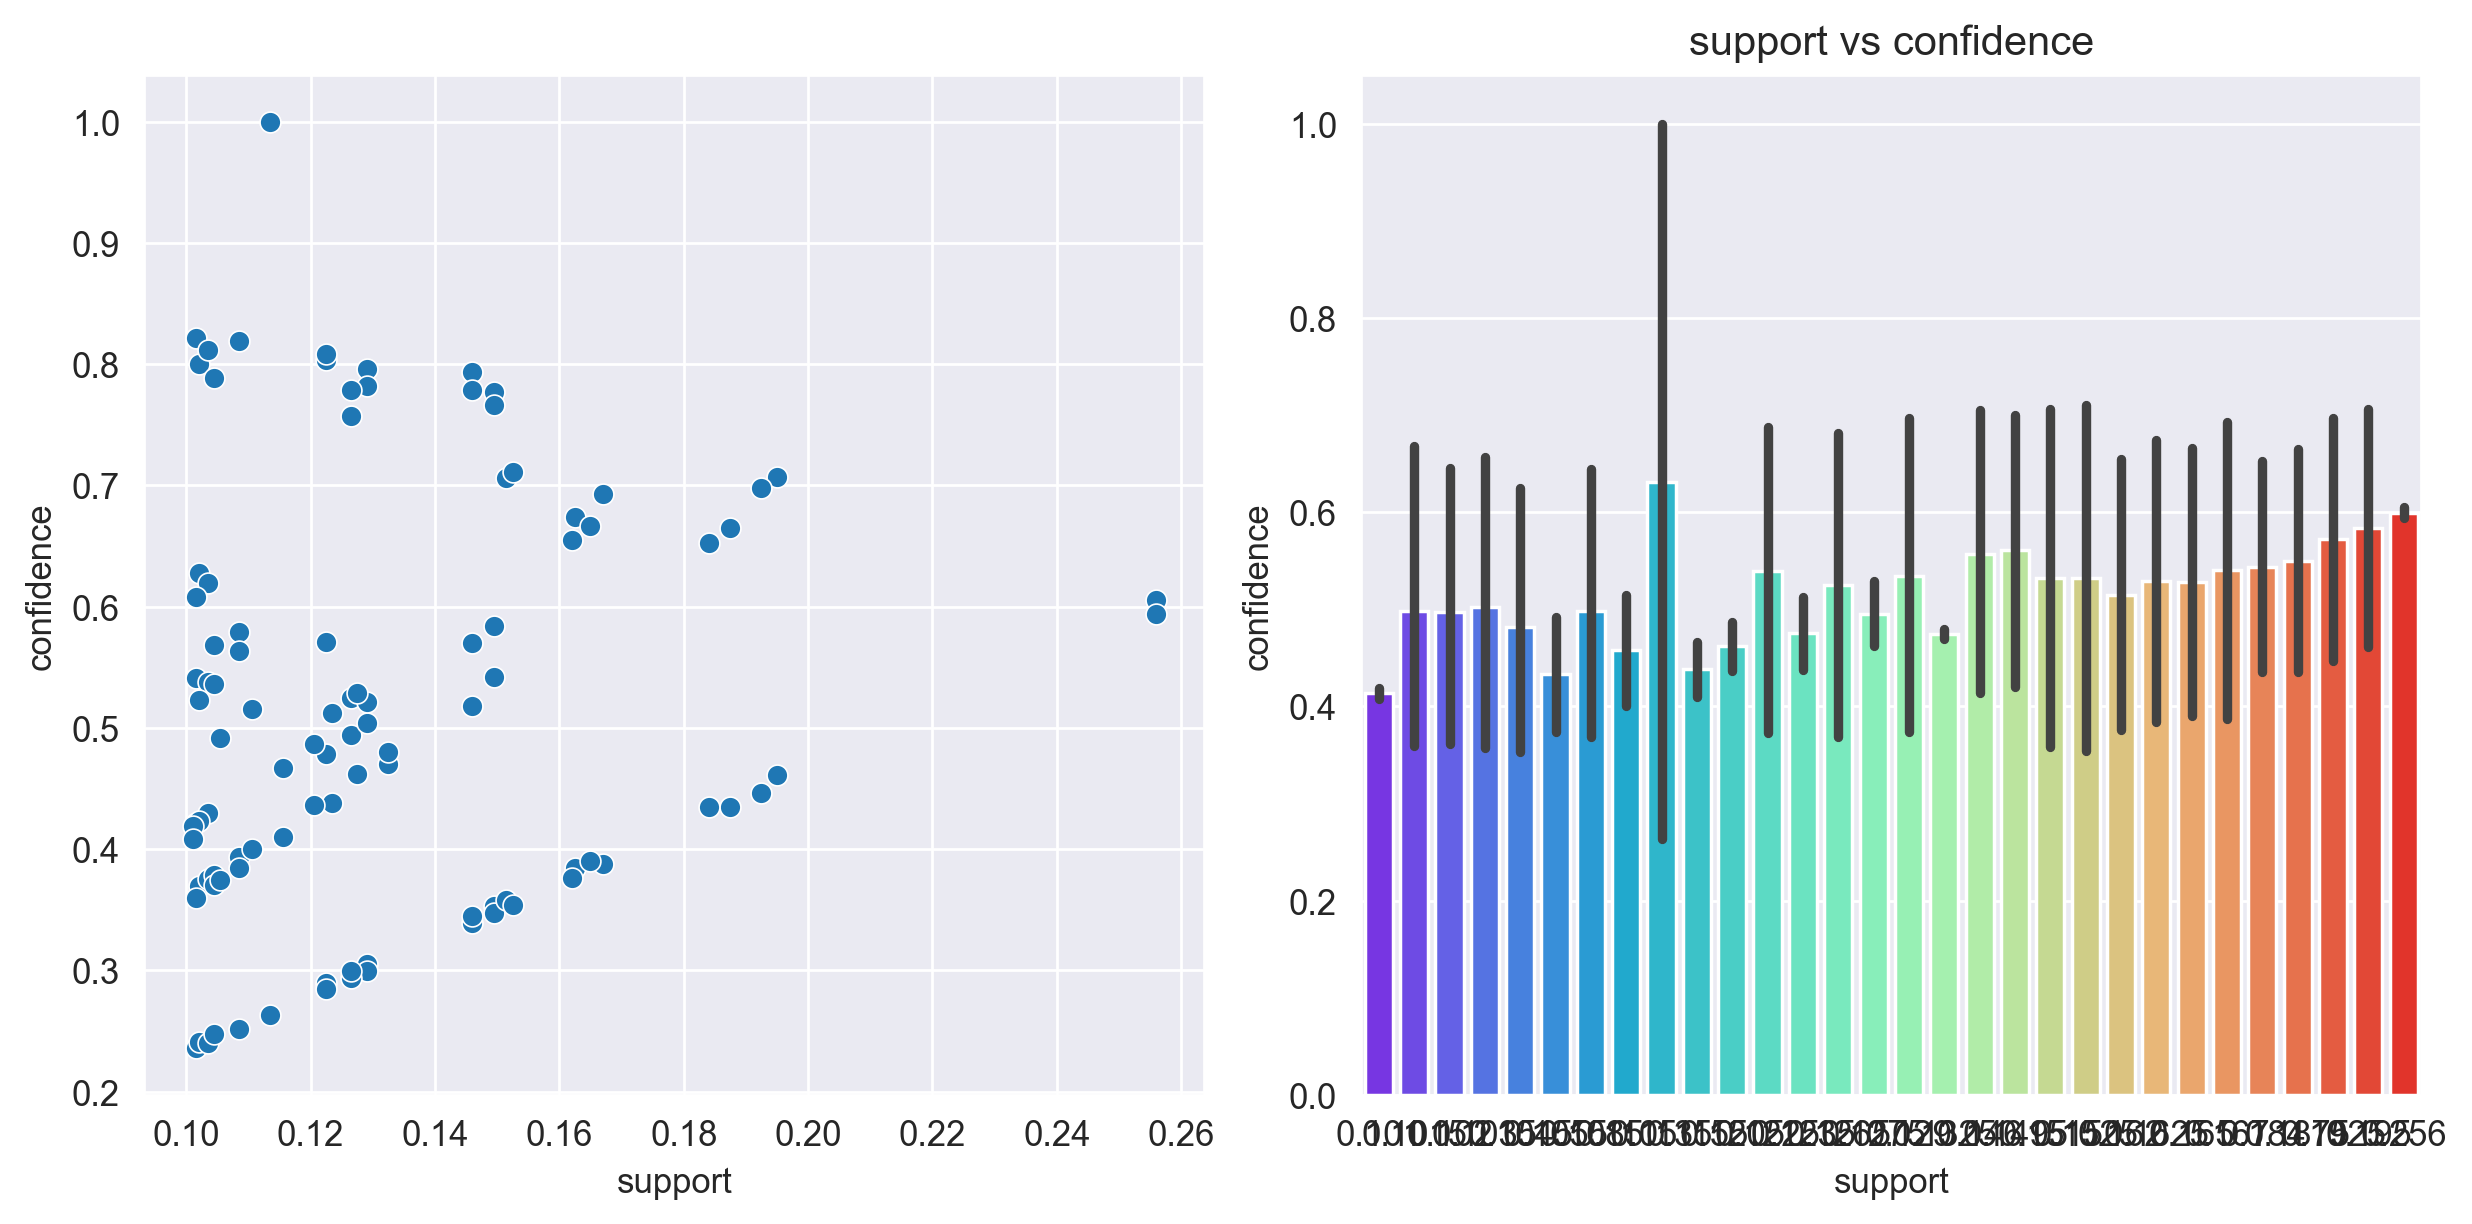

In [30]:
fig, ax = plt.subplots(ncols=2)

sns.scatterplot(vm_15['support'],vm_15['confidence'], palette='rainbow', ax= ax[0])
plt.title('support vs confidence')
sns.barplot(vm_15['support'],vm_15['confidence'], palette='rainbow', ax= ax[1])

plt.tight_layout()

##### Ploting Meatmap

Text(0.5, 1.0, 'HeatMap - ForLiftMatrix')

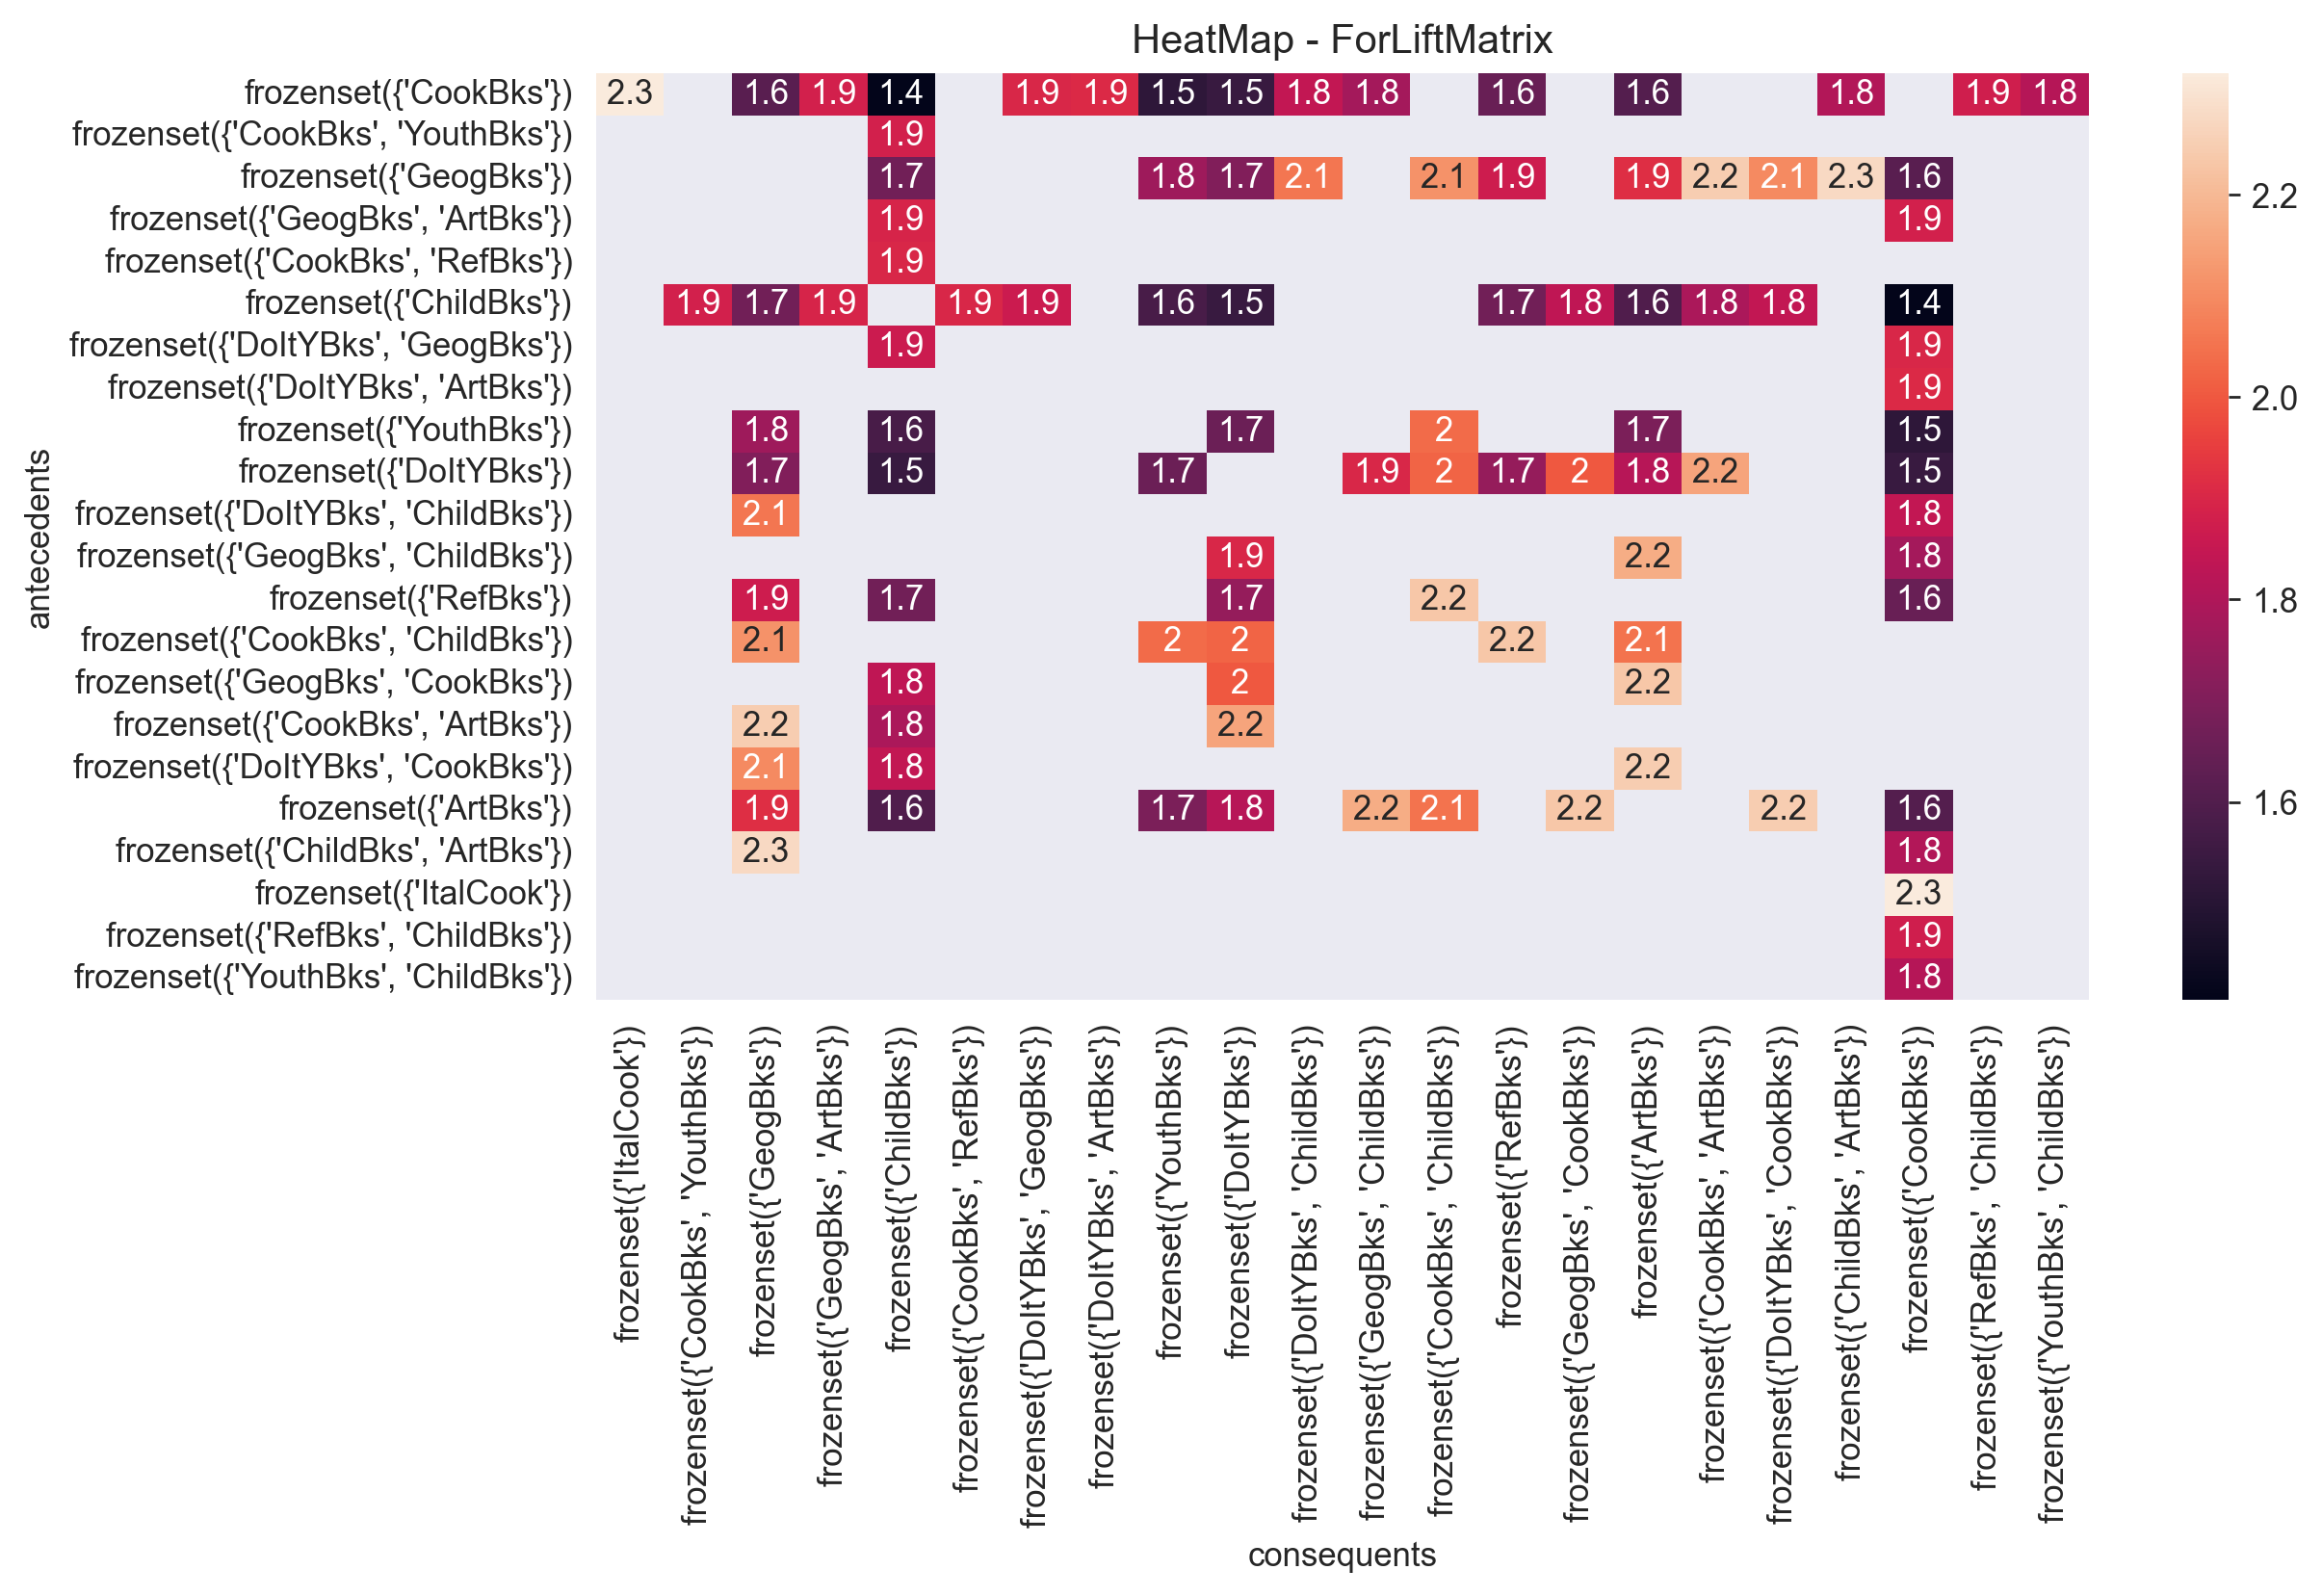

In [31]:
matrix_10 = model_10_lift1.pivot('antecedents','consequents','lift')
sns.heatmap(matrix_10, annot=True)
plt.title('HeatMap - ForLiftMatrix')